In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import sys
import warnings
warnings.filterwarnings("ignore")
path = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Giada/Files/"
path_df = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Tweets/"
path_files = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Files/"
path_utils = 'C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/tweet_utils'
sys.path.append(path_utils)
import utils

# Indice

- [Import and read](#import)
- [Hashtags](#hashtags)
- [URLs shared](#urls)
- [Split](#split)
- [Retweet network - Leiden](#nt_l)
- [Retweet network - Louvain](#nt_l2)
- [YouTube](#yt)
- [Credibility Domains shared](#cred)

# Import and read Data
<a id="import"/>

In [3]:
good = pd.read_csv(path + "good.csv")
bad = pd.read_csv(path + "bad.csv")
good_lst = list(good["screen_name"])
bad_lst = list(bad["screen_name"])
good_rt = pd.read_csv(path_df + "good_rt.csv")
bad_rt = pd.read_csv(path_df + "bad_rt.csv")
good_lst = list(good["screen_name"])
bad_lst = list(bad["screen_name"])
good_rt_lst = list(good_rt["screen_name"])
bad_rt_lst = list(bad_rt["screen_name"])

In [4]:
# df = pd.read_parquet(path_df + "tweets.parquet", engine="fastparquet")
# good_activities = df[df["user_screen_name"].isin(good_lst)]
# bad_activities = df[df["user_screen_name"].isin(bad_lst)]
# rt_in_good = df[df["rt_user_screen_name"].isin(good_lst)]
# rt_in_bad = df[df["rt_user_screen_name"].isin(bad_lst)]
# good_activities.to_csv(path_df + "good_activities.csv", encoding="utf-8", line_terminator="\n", index=False)
# bad_activities.to_csv(path_df + "bad_activities.csv", encoding="utf-8", line_terminator="\n", index=False)
# rt_in_bad.to_csv(path_df + "rt_in_bad.csv", encoding="utf-8", line_terminator="\n", index=False)
# rt_in_good.to_csv(path_df + "rt_in_good.csv", encoding="utf-8", line_terminator="\n", index=False)

In [4]:
good_activities = pd.read_csv(path_df + "good_activities.csv", encoding="utf-8", lineterminator="\n", low_memory=False)
bad_activities = pd.read_csv(path_df + "bad_activities.csv", encoding="utf-8", lineterminator="\n", low_memory=False)
rt_in_bad = pd.read_csv(path_df + "rt_in_bad.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
rt_in_good = pd.read_csv(path_df + "rt_in_good.csv", lineterminator="\n", low_memory=False, encoding="utf-8")

# Hashtags
<a id="hashtags"/>

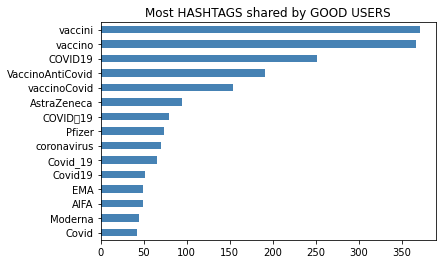

In [21]:
lst_prova = utils.hashtag_process_list(good_activities["hashtags"])
lst_prova_2 = [i for i in lst_prova if i != "[]"]
lst_prova_3 = []
for i in lst_prova_2:
    for j in i:
        lst_prova_3.append(j)
val = pd.Series(lst_prova_3).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='steelblue')
ax.set_title('Most HASHTAGS shared by GOOD USERS')
ax.invert_yaxis()
plt.show()

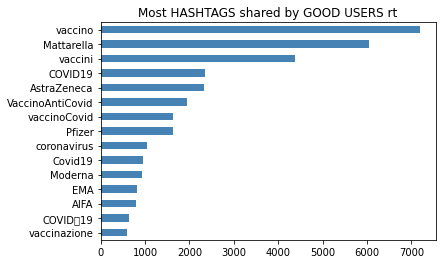

In [6]:
lst_prova = utils.hashtag_process_list(rt_in_good["hashtags"])
lst_prova_2 = [i for i in lst_prova if i != "[]"]
lst_prova_3 = []
for i in lst_prova_2:
    for j in i:
        lst_prova_3.append(j)
val = pd.Series(lst_prova_3).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='steelblue')
ax.set_title('Most HASHTAGS shared by GOOD USERS rt')
ax.invert_yaxis()
plt.show()

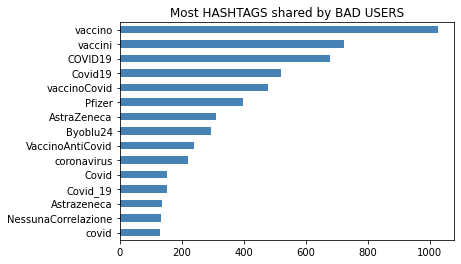

In [22]:
lst_prova = utils.hashtag_process_list(bad_activities["hashtags"])
lst_prova_2 = [i for i in lst_prova if i != "[]"]
lst_prova_3 = []
for i in lst_prova_2:
    for j in i:
        lst_prova_3.append(j)
val = pd.Series(lst_prova_3).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='steelblue')
ax.set_title('Most HASHTAGS shared by BAD USERS')
ax.invert_yaxis()
plt.show()

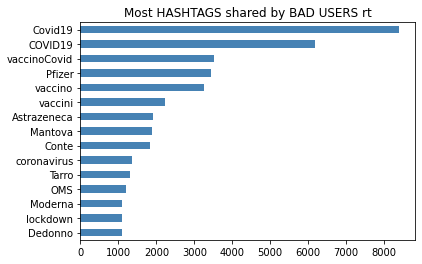

In [7]:
lst_prova = utils.hashtag_process_list(rt_in_bad["hashtags"])
lst_prova_2 = [i for i in lst_prova if i != "[]"]
lst_prova_3 = []
for i in lst_prova_2:
    for j in i:
        lst_prova_3.append(j)
val = pd.Series(lst_prova_3).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='steelblue')
ax.set_title('Most HASHTAGS shared by BAD USERS rt')
ax.invert_yaxis()
plt.show()

In [6]:
hs_sage = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/sage/data/outfile_good_bad_hs.csv")
hs_sage_good = hs_sage[15:][["word"]].reset_index(drop=True)
hs_sage_bad = hs_sage[:16][["word"]].reset_index(drop=True)
txt_sage = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/sage/data/outfile_good_bad_txt.csv")
txt_sage_good = txt_sage[15:][["word"]].reset_index(drop=True)
txt_sage_bad = txt_sage[:16][["word"]].reset_index(drop=True)

In [7]:
print("SAGE")
info = []
hs_sage = list(hs_sage_good["word"])
for i in range(len(hs_sage)):
    info.append("Provax")
for i in range(len(hs_sage)):
    info.append("Novax")
hs_sage.extend(list(hs_sage_bad["word"]))
txt_sage = list(txt_sage_good["word"])
txt_sage.extend(txt_sage_bad["word"])
df_sage_info = pd.DataFrame(list(zip(info, hs_sage, txt_sage)), columns=["User", "Hashtag", "Text"])
df_sage_info

SAGE


,User,Hashtag,Text
0,Provax,medicalfacts,medicalfacts
1,Provax,lavitaindiretta,gimbe
2,Provax,robertoburioni,aiuteranno
3,Provax,ifattivostri,integrare
4,Provax,regioni,fidiamoci
5,Provax,gimbe,sbrighiamoci
6,Provax,unomattina,saturi
7,Provax,vaccinale,regolatorie
8,Provax,decretoriaperture,consegnate
9,Provax,forrest,sintomatica


# URLs Shared
<a id="urls"/>

In [45]:
# tweets_with_urls = pd.read_parquet(path_df+"tweets_with_urls_and_domain_and_score (4.0).parquet", engine="fastparquet")
# tweets_with_urls
importlib.reload(utils)

<module 'utils' from 'C:\\Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/tweet_utils\\utils.py'>

In [12]:
x = utils.extract_domain_list(good_activities)
good_urls = []
cont = 0
for i in x:
    if i != []:
        for j in i:
            if ("twitter" in j) | (bit)
            good_urls.append(j)

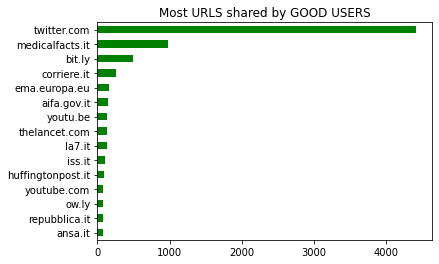

In [13]:
val = pd.Series(good_urls).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='green')
ax.set_title('Most URLS shared by GOOD USERS')
ax.invert_yaxis()
plt.show()

# Split
<a id="split"/>

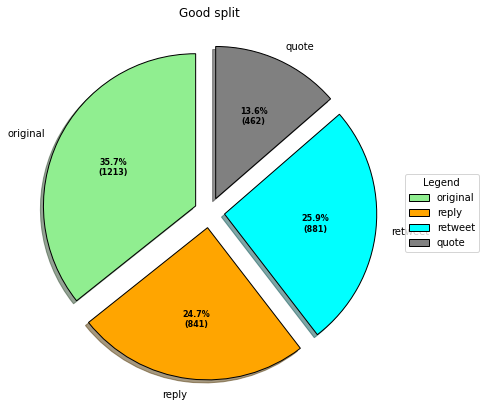

In [23]:
x = utils.split(good_activities)
labels = list(x.keys())
values = list(x.values())
utils.print_pie_chart4("Good split", labels, values)

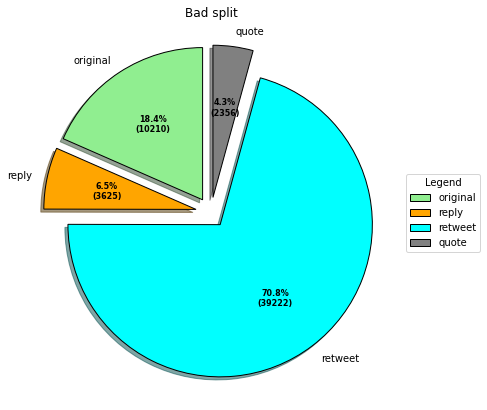

In [24]:
x = utils.split(bad_activities)
labels = list(x.keys())
values = list(x.values())
utils.print_pie_chart4("Bad split", labels, values)

# Rt network - Leiden
<a id="nt_l"/>

In [11]:
leiden = pd.read_csv(path_files + "leiden.csv")
pd.Series(leiden[leiden["user"].isin(bad_rt_lst)]["community"]).value_counts().sort_values(ascending=False)

2       12606
4         332
3         320
1         235
5         193
        ...  
2589        1
3189        1
1169        1
271         1
353         1
Name: community, Length: 100, dtype: int64

In [12]:
pd.Series(leiden[leiden["user"].isin(good_rt_lst)]["community"]).value_counts().sort_values(ascending=False)

0       25727
3        2816
1        2463
4        1897
7         166
        ...  
349         1
1031        1
214         1
777         1
38          1
Name: community, Length: 114, dtype: int64

# Rt network - Louvain
<a id="nt_l2"/>

In [25]:
louvain = pd.read_csv(path_files + "louvain.csv")
pd.Series(louvain[louvain["name"].isin(bad_rt_lst)]["community"]).value_counts().sort_values(ascending=False)

4       12844
3         455
2         206
0         198
34        174
        ...  
3382        1
3481        1
3493        1
361         1
3583        1
Name: community, Length: 61, dtype: int64

In [26]:
pd.Series(louvain[louvain["name"].isin(good_rt_lst)]["community"]).value_counts().sort_values(ascending=False)

0       25394
3        3458
2        3258
5         746
1         217
        ...  
619         1
2691        1
144         1
2867        1
126         1
Name: community, Length: 113, dtype: int64

# YouTube
<a id="yt"/>

In [13]:
# tweets = pd.read_parquet(path_df + "tweets.parquet", engine = "fastparquet")
# import emoji
# lst = []
# for i in tqdm(tweets[tweets["text"]!="[]"][["id","text","user_screen_name"]].itertuples()):
#     for c in i.text:
#         if c in emoji.UNICODE_EMOJI['en']:
#             lst.append(i.user_screen_name)
# x = pd.Series(lst).value_counts().sort_values(ascending=False).keys()
# print(len(x))
# bad_count = 0
# good_count = 0
# for i in tqdm(list(x)):
#     if (i in bad_lst) | (i in bad_rt_lst):
#         bad_count = bad_count + 1
#     elif (i in good_lst) | (i in good_rt_lst):
#         good_count = good_count + 1
# print(good_count)
# print(bad_count)

In [30]:
# tweets = pd.read_parquet(path_df + "tweets_with_urls_and_domain_and_score (3.0).parquet", engine = "fastparquet")
# yt_df = pd.read_csv(path + "youtube_info.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
# yt_df

In [9]:
# tweets = pd.read_parquet(path_df + "tweets.parquet", engine="fastparquet")
# yt_df = tweets[(tweets["urls"].str.contains("https://youtu.be")) | (tweets["urls"].str.contains("https://youtube"))]
# value = []
# for i in tqdm(yt_df["urls"]):
#     url_exp = i.split(" ")
#     lst_inside = []
#     for exp in range(len(url_exp)):
#         if url_exp[exp] == "'expanded_url':":
#             lst_inside.append(url_exp[exp+1][1:-2])
#     value.append(lst_inside)
# yt_df["domains"] = value
# yt_df
yt_df.to_csv("C:/Users/gianl/Desktop/Gi/dataset_prova.csv", line_terminator="\n", index=False, encoding="utf-8")

In [25]:
yt_df = pd.read_csv(path_df + "yt_info.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
yt_df

,screen_name,url,title,description,type,available,reason,occurrency
0,Graziel65255465,https://youtu.be/-gdwEs4Ficw,"Libertà, Libertà",NaN,compressed,True,Parsed,2
1,xenonian1,https://youtu.be/DouCbWbLa7E,vaccini mortali ai militari - sindrome senza b...,non è l'URANIO sono i VACCINI che hanno fatto ...,compressed,True,Parsed,5
2,xenonian1,https://youtu.be/AwRqhGfRAlc,vaccini mortali ai militari - sindrome senza b...,non è l'Uranio ma i VACCINI: più di 1400 milit...,compressed,True,Parsed,2
3,MFulvia,https://youtu.be/HB994BBNLok,Nota Vocale per la Giornata della Memoria,#NotaVocale alla #Memoria...Non ti dimenticare...,compressed,True,Parsed,6
4,bluebird19473,https://youtu.be/8pC1xwFfS_g,NaN,NaN,compressed,False,Unavailable,1
...,...,...,...,...,...,...,...,...
20590,DiegoDan80,https://youtu.be/XEQ2-jssdFI,Nido del Cuculo - Roberto Scimmiato,ridoppiaggio in livornese di un film horror,compressed,True,Parsed,1
20591,Euro_comunica,https://youtu.be/FoZJXSbclZA,"Oms, per i Paesi più poveri mancano i vaccini....","Mentre in Germania dal 7 giugno tutti, dai 16 ...",compressed,True,Parsed,1
20592,KattInForma,https://youtu.be/6VHVvogoyTE,Vaccini: anticorpi e immunità. Stop mascherine...,"Il Prof. Francesco Broccolo, Docente di Microb...",compressed,True,Parsed,1
20593,KattInForma,https://youtu.be/j2-Guu_no_8,Vaccino e seconda dose. Pressione alta e cibi....,"La Dott.ssa Roberta Rettagliati, medico di fam...",compressed,True,Parsed,1


In [37]:
bad_yt = yt_df[yt_df["screen_name"].isin(bad_lst)]
pd.Series(bad_yt["reason"]).value_counts().sort_values(ascending=False).values
print(f"Availability: {round(2948/3713,2)*100}%")

Availability: 79.0%


In [39]:
good_yt = yt_df[yt_df["screen_name"].isin(good_lst)]
pd.Series(good_yt["reason"]).value_counts().sort_values(ascending=False).values
print(f"Availability: {round(21/24,2)*100}%")

Availability: 88.0%


In [42]:
good_yt.to_csv(path_files + "good_yt.csv", encoding="utf-8", line_terminator="\n", index=False)
bad_yt.to_csv(path_files + "bad_yt.csv", encoding="utf-8", line_terminator="\n", index=False)

# Credibility
<a id="cred"/>

In [9]:
cred_user = pd.read_csv(path_files + "result_cred_score_thresh_20.csv", lineterminator="\n")
cred_user

,user_screen_name,number_of_urls,HIGH,LOW,UNKW,SOCIAL,conspiracy_score
0,infoitinterno,17471,12,17267,192,0,1.0
1,Alberto25090565,212,0,106,0,106,1.0
2,contro_informa,27,0,27,0,0,1.0
3,Libero_official,451,0,451,0,0,1.0
4,FrontieraRieti,44,0,42,2,0,1.0
...,...,...,...,...,...,...,...
5218,LucaBraia,20,0,0,17,3,NaN
5219,AodiFoad,20,0,0,13,7,NaN
5220,ArturoMarghera,20,0,0,20,0,NaN
5221,AriaPulitaER,20,0,0,20,0,NaN


In [49]:
merge_bad = bad.merge(cred_user, left_on="screen_name", right_on="user_screen_name", how="left")
merge_good = good.merge(cred_user, left_on="screen_name", right_on="user_screen_name", how="left")
merge_bad_rt = bad_rt.merge(cred_user, left_on="screen_name", right_on="user_screen_name", how="left")
merge_good_rt = good_rt.merge(cred_user, left_on="screen_name", right_on="user_screen_name", how="left")

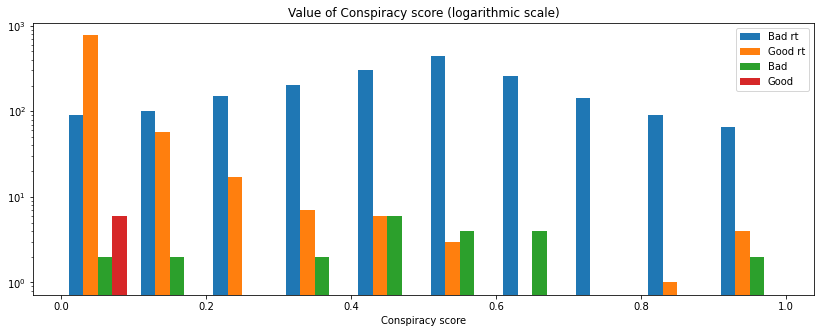

In [57]:
plt.hist([merge_bad_rt["conspiracy_score"], 
          merge_good_rt["conspiracy_score"],
          merge_bad["conspiracy_score"], 
          merge_good["conspiracy_score"]],
          label=['Bad rt', 'Good rt', 'Bad', 'Good'])
plt.legend(loc='upper right')
plt.title("Value of Conspiracy score (logarithmic scale)")
plt.yscale('log', nonposy='clip')
plt.xlabel("Conspiracy score")
plt.rcParams["figure.figsize"] = (14,5)
plt.show()

#### Conspiracy - Network

In [ ]:
merged_louvain = louvain.merge(cred_user, left_on="name", right_on="user_screen_name", how="left")
merged_louvain_bad = merged_louvain[merged_louvain["community"]==4]
merged_louvain_good = merged_louvain[merged_louvain["community"]==0]
merged_louvain_influencer = merged_louvain[merged_louvain["community"]==2]
merged_louvain_paper = merged_louvain[merged_louvain["community"]==3]

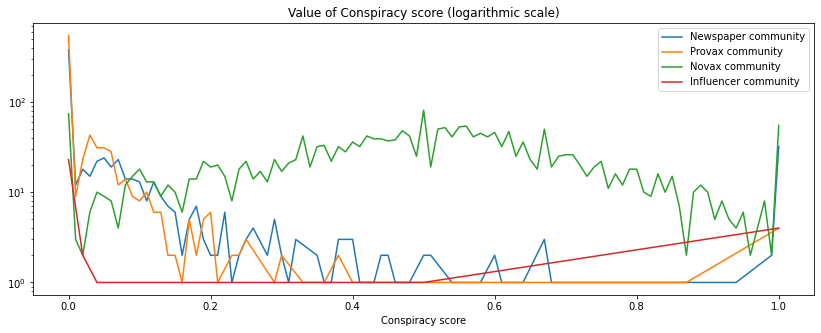

In [98]:
# Line plot
x = pd.Series(merged_louvain_paper["conspiracy_score"]).value_counts().sort_index(ascending=False)
x2 = pd.Series(merged_louvain_good["conspiracy_score"]).value_counts().sort_index(ascending=False)
x3 = pd.Series(merged_louvain_bad["conspiracy_score"]).value_counts().sort_index(ascending=False)
x4 = pd.Series(merged_louvain_influencer["conspiracy_score"]).value_counts().sort_index(ascending=False)
plt.plot(list(x.keys()), list(x.values), label="Newspaper community")
plt.plot(list(x2.keys()), list(x2.values), label="Provax community")
plt.plot(list(x3.keys()), list(x3.values), label="Novax community")
plt.plot(list(x4.keys()), list(x4.values), label="Influencer community")

plt.legend(loc='upper right')
plt.title("Value of Conspiracy score (logarithmic scale)")
plt.yscale('log', nonposy='clip')
plt.xlabel("Conspiracy score")
plt.rcParams["figure.figsize"] = (14,5)
plt.show()

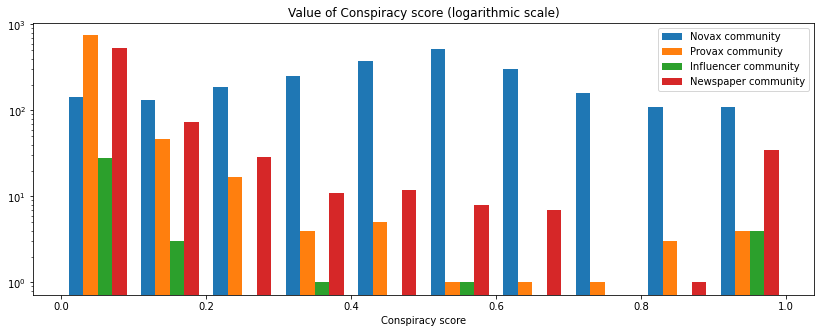

In [99]:
#Histogram
plt.hist([merged_louvain_bad["conspiracy_score"], 
          merged_louvain_good["conspiracy_score"],
          merged_louvain_influencer["conspiracy_score"],
          merged_louvain_paper["conspiracy_score"]],
          label=['Novax community', 'Provax community', "Influencer community", "Newspaper community"])
plt.legend(loc='upper right')
plt.title("Value of Conspiracy score (logarithmic scale)")
plt.yscale('log', nonposy='clip')
plt.xlabel("Conspiracy score")
plt.rcParams["figure.figsize"] = (14,5)
plt.show()